# Daily Dose of Data Science

A practice notebook for Vanna - the superchaged text-to-SQL tool

[Vanna: The Trainable Text-to-SQL Agent All Data Scientists Were Looking For](https://www.blog.dailydoseofds.com/p/vanna-the-trainable-text-to-sql-agent)

Author: Avi Chawla

## Install Vanna

In [ ]:
!pip install vanna

## Create an account here to get the APi Key: [Vanna Login](https://vanna.ai/account/login?next=/account/profile)

In [ ]:
api_key = ""

In [1]:
import vanna as vn
vn.set_api_key(api_key)

## Set model

In [3]:
vn.set_model('chinook') # model provided by Vanna

## Connect to Database

In [4]:
vn.connect_to_sqlite('https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite')

## Ask queries

In [5]:
vn.ask('What are the top 10 artists by sales?')

SELECT a.name,
       sum(il.quantity) as totalsales
FROM   artist a
    INNER JOIN album al
        ON a.artistid = al.artistid
    INNER JOIN track t
        ON al.albumid = t.albumid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY a.name
ORDER BY totalsales desc limit 10;


Name  totalsales
0              Iron Maiden         140
1                       U2         107
2                Metallica          91
3             Led Zeppelin          87
4  Os Paralamas Do Sucesso          45
5              Deep Purple          44
6            Faith No More          42
7                     Lost          41
8             Eric Clapton          40
9                   R.E.M.          39

AI-generated follow-up questions:

* Who is the artist with the highest sales?
* What are the sales figures for each artist in the top 10?
* Can you provide a breakdown of sales by album for each artist in the top 10?
* Which genre has the highest sales?
* What are the top-selling albums of all time?
* Are there any artists from a specific country in the top 10?
* Can you provide a list of the top 10 tracks by sales?
* What is the average sales figure for all artists?
* How does the sales performance of the top 10 artists compare to the rest of the artists?
* Can you provide a list of the top-selling genres?
* How many tracks were sold by each artist in the top 10?
* What is the total revenue generated by the top 10 artists?
* Are there any artists that have multiple albums in the top 10?
* What is the average number of sales per album for the top 10 artists?
* Is there a correlation between track duration and sales?


In [6]:
query = """Retrieve a list of customers who have made at least one purchase. 
Include their contact information, the total amount they've spent, 
the number of purchases, the average order value, and their most frequently purchased track_id.
"""

vn.ask(query)

WITH customer_purchases AS (
    SELECT c.CustomerId,
           c.FirstName,
           c.LastName,
           c.Email,
           c.Phone,
           COUNT(i.InvoiceId) AS NumberOfPurchases,
           SUM(i.Total) AS TotalAmountSpent,
           AVG(i.Total) AS AverageOrderValue,
           il.TrackId AS MostFrequentlyPurchasedTrackId,
           COUNT(il.TrackId) AS Frequency
    FROM Customer c
    INNER JOIN Invoice i ON c.CustomerId = i.CustomerId
    INNER JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
    GROUP BY c.CustomerId, c.FirstName, c.LastName, c.Email, c.Phone, il.TrackId
)
SELECT cp.CustomerId,
       cp.FirstName,
       cp.LastName,
       cp.Email,
       cp.Phone,
       cp.NumberOfPurchases,
       cp.TotalAmountSpent,
       cp.AverageOrderValue,
       cp.MostFrequentlyPurchasedTrackId
FROM customer_purchases cp
WHERE cp.Frequency = (
    SELECT MAX(Frequency)
    FROM customer_purchases
    WHERE CustomerId = cp.CustomerId
);


CustomerId FirstName    LastName                     Email  \
0              1      Luís   Gonçalves      luisg@embraer.com.br   
1              1      Luís   Gonçalves      luisg@embraer.com.br   
2              1      Luís   Gonçalves      luisg@embraer.com.br   
3              1      Luís   Gonçalves      luisg@embraer.com.br   
4              1      Luís   Gonçalves      luisg@embraer.com.br   
...          ...       ...         ...                       ...   
2235          59      Puja  Srivastava  puja_srivastava@yahoo.in   
2236          59      Puja  Srivastava  puja_srivastava@yahoo.in   
2237          59      Puja  Srivastava  puja_srivastava@yahoo.in   
2238          59      Puja  Srivastava  puja_srivastava@yahoo.in   
2239          59      Puja  Srivastava  puja_srivastava@yahoo.in   

                   Phone  NumberOfPurchases  TotalAmountSpent  \
0     +55 (12) 3923-5555                  1             13.86   
1     +55 (12) 3923-5555                  1             13.86   
2     +55 (12) 3923-5555                  1             13.86   
3     +55 (12) 3923-5555                  1             13.86   
4     +55 (12) 3923-5555                  1             13.86   
...                  ...                ...               ...   
2235    +91 080 22289999                  1              8.91   
2236    +91 080 22289999                  1              8.91   
2237    +91 080 22289999                  1              8.91   
2238    +91 080 22289999                  1              8.91   
2239    +91 080 22289999                  1              1.99   

      AverageOrderValue  MostFrequentlyPurchasedTrackId  
0                 13.86                             262  
1                 13.86                             271  
2                 13.86                             280  
3                 13.86                             289  
4                 13.86                             298  
...                 ...                             ...  
2235               8.91                            2346  
2236               8.91                            2352  
2237               8.91                            2358  
2238               8.91                            2364  
2239               1.99                            3246  

[2240 rows x 9 columns]

AI-generated follow-up questions:

* Can you provide the contact information for the customers who have made the most purchases?
* What is the average order value for each customer?
* Which customer has spent the highest amount in total?
* Can you give me the contact information for the customer with the highest average order value?
* How many customers have made only one purchase?
* Which track has been purchased the most across all customers?
* How many customers have purchased each track?
* Can you provide a breakdown of the total amount spent by customers from each country?
* What is the average order value for customers from each country?
* Can you give me the contact information for the customer who made the largest single purchase?


## Try it out

Here's the database schema, ask anything you wish to ask:

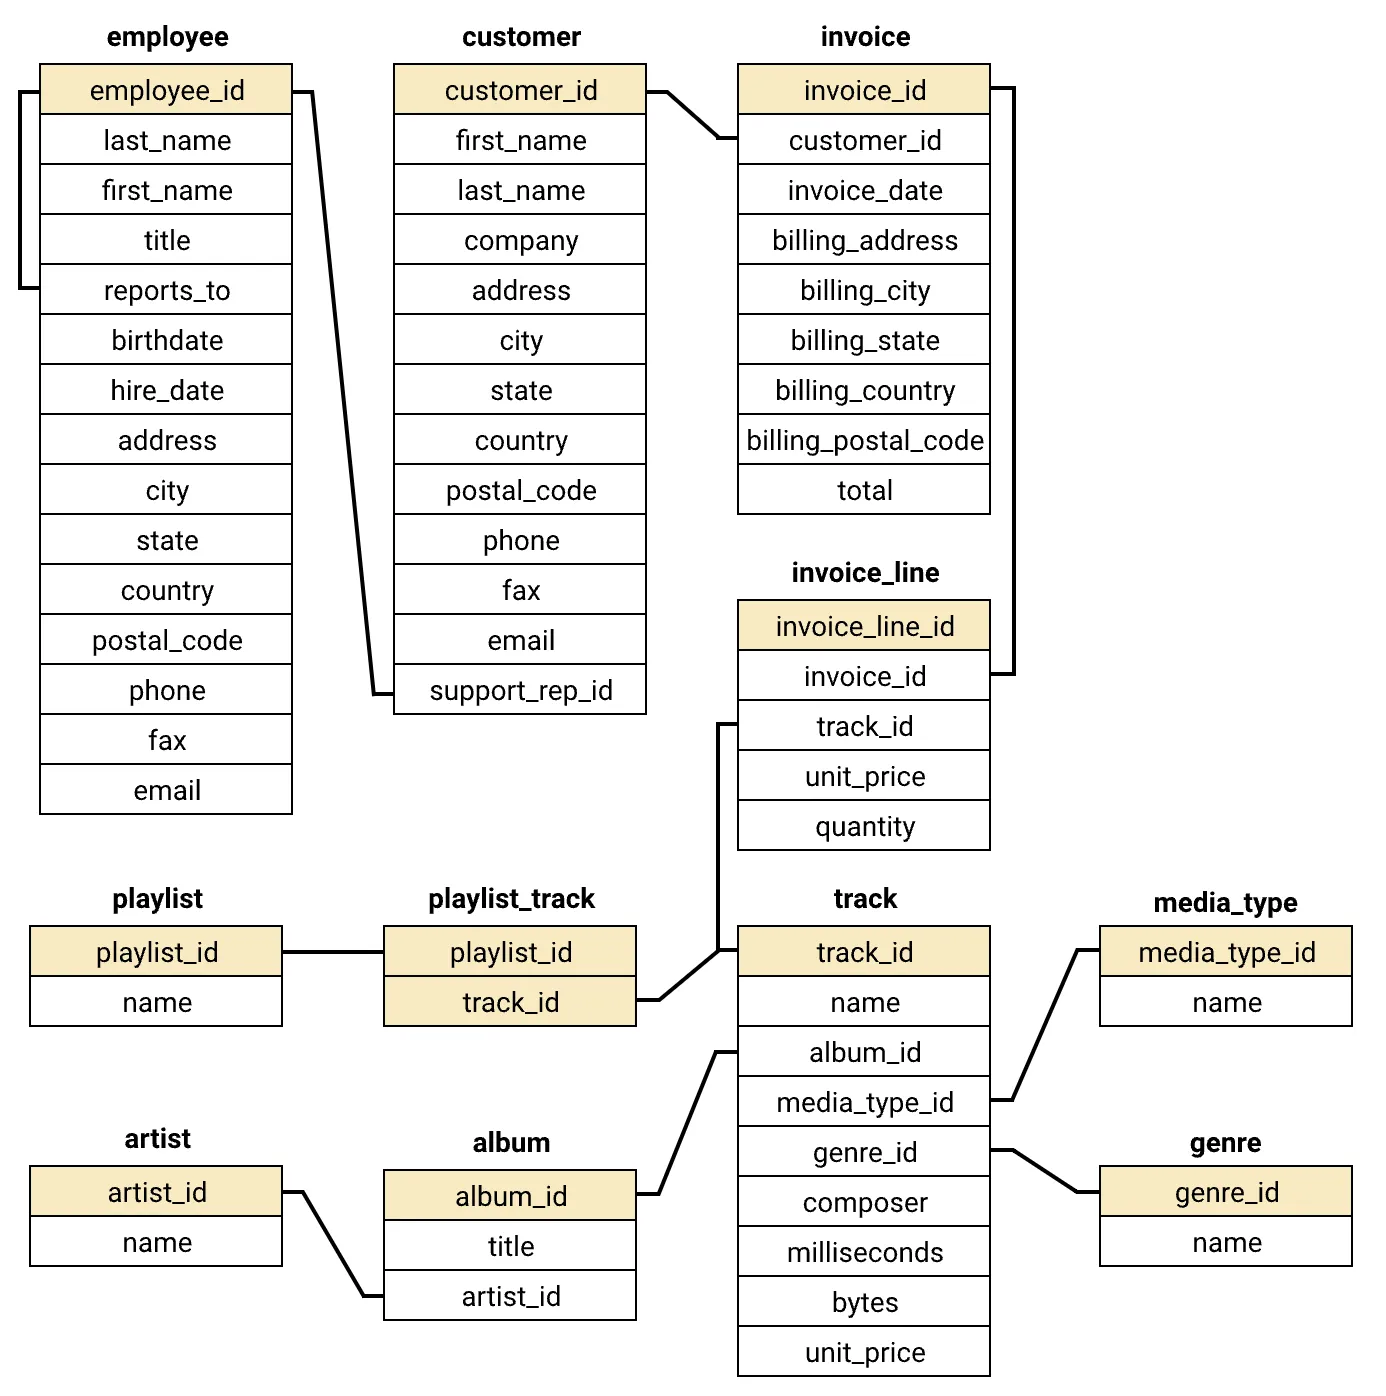

In [ ]:
query = """
"""

vn.ask(query)